In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv("Startup Failure (Finance and Insurance).csv")

In [33]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    47 non-null     object 
 1   Sector                  47 non-null     object 
 2   Years of Operation      47 non-null     object 
 3   What They Did           47 non-null     object 
 4   How Much They Raised    47 non-null     object 
 5   Why They Failed         47 non-null     object 
 6   Takeaway                47 non-null     object 
 7   Giants                  47 non-null     int64  
 8   No Budget               47 non-null     int64  
 9   Competition             47 non-null     int64  
 10  Poor Market Fit         47 non-null     int64  
 11  Acquisition Stagnation  47 non-null     int64  
 12  Platform Dependency     47 non-null     int64  
 13  Monetization Failure    47 non-null     int64  
 14  Niche Limits            47 non-null     int6

(None,
              Name                 Sector Years of Operation  \
 0           Avant  Finance and Insurance          2012-2023   
 1         Bitpass  Finance and Insurance          2002-2008   
 2  Cake Financial  Finance and Insurance          2006-2011   
 3          Circle  Finance and Insurance          2013-2023   
 4   Clarity Money  Finance and Insurance          2016-2022   
 
                     What They Did How Much They Raised  \
 0           Online personal loans                $655M   
 1          Micropayments platform                  $2M   
 2         Portfolio tracking tool                  $3M   
 3  Crypto payments and stablecoin                $500M   
 4            Personal finance app                 $11M   
 
                            Why They Failed                     Takeaway  \
 0    Lost to LendingClub and high defaults   Lending needs risk balance   
 1          Lost to PayPal and low adoption  Micropayments need mass use   
 2       Lost to Mint a

# Step 1: Understanding the Dataset

# Step 2: Data Cleaning Steps

In [35]:
# Convert 'Years of Operation' to numeric values (calculating the duration in years)
df['Start Year'] = df['Years of Operation'].str.split('-').str[0].astype(int)
df['End Year'] = df['Years of Operation'].str.split('-').str[1].astype(int)
df['Years Active'] = df['End Year'] - df['Start Year']

In [45]:
df.head(5)

,Name,Sector,What They Did,How Much They Raised,Why They Failed,Takeaway,Giants,No Budget,Competition,Poor Market Fit,...,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype,Start Year,End Year,Years Active
0,Avant,Finance and Insurance,Online personal loans,655.0,Lost to LendingClub and high defaults,Lending needs risk balance,1,1,1,0,...,0,0,0,0,0,0,0.0,2012,2023,11
1,Bitpass,Finance and Insurance,Micropayments platform,2.0,Lost to PayPal and low adoption,Micropayments need mass use,1,0,1,1,...,0,0,0,0,0,0,0.0,2002,2008,6
2,Cake Financial,Finance and Insurance,Portfolio tracking tool,3.0,Lost to Mint and sold to TradeKing,Finance tools need scale,1,0,1,0,...,0,0,0,0,0,0,0.0,2006,2011,5
3,Circle,Finance and Insurance,Crypto payments and stablecoin,500.0,Lost to Coinbase and market shifts,Crypto needs stability,1,0,1,0,...,0,0,0,1,0,0,0.0,2013,2023,10
4,Clarity Money,Finance and Insurance,Personal finance app,11.0,Lost to Mint/Acorns and sold to Goldman,Finance apps need edge,1,0,1,0,...,0,0,0,0,0,0,0.0,2016,2022,6


In [42]:
import re
# Extracting numeric values from 'How Much They Raised' and convert to float
df['How Much They Raised'] = df['How Much They Raised'].apply(lambda x: re.search(r'\d+\.?\d*', str(x)).group() if re.search(r'\d+\.?\d*', str(x)) else '0').astype(float)

In [43]:
# Handling missing values in 'Overhype' (fill with median)
df['Overhype'].fillna(df['Overhype'].median(), inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_2060\3448762123.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Overhype'].fillna(df['Overhype'].median(), inplace=True)


In [44]:
# Dropping redundant columns "Years of Operation" as we have created 3-new columns "Start Year", "End Year", and "Active Year".
df.drop(columns=['Years of Operation'], inplace=True, errors='ignore')

In [46]:
# Standardizing column names (replace spaces with underscores and lowercase)
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [47]:
df.head()

,name,sector,what_they_did,how_much_they_raised,why_they_failed,takeaway,giants,no_budget,competition,poor_market_fit,...,monetization_failure,niche_limits,execution_flaws,trend_shifts,toxicity/trust_issues,regulatory_pressure,overhype,start_year,end_year,years_active
0,Avant,Finance and Insurance,Online personal loans,655.0,Lost to LendingClub and high defaults,Lending needs risk balance,1,1,1,0,...,0,0,0,0,0,0,0.0,2012,2023,11
1,Bitpass,Finance and Insurance,Micropayments platform,2.0,Lost to PayPal and low adoption,Micropayments need mass use,1,0,1,1,...,0,0,0,0,0,0,0.0,2002,2008,6
2,Cake Financial,Finance and Insurance,Portfolio tracking tool,3.0,Lost to Mint and sold to TradeKing,Finance tools need scale,1,0,1,0,...,0,0,0,0,0,0,0.0,2006,2011,5
3,Circle,Finance and Insurance,Crypto payments and stablecoin,500.0,Lost to Coinbase and market shifts,Crypto needs stability,1,0,1,0,...,0,0,0,1,0,0,0.0,2013,2023,10
4,Clarity Money,Finance and Insurance,Personal finance app,11.0,Lost to Mint/Acorns and sold to Goldman,Finance apps need edge,1,0,1,0,...,0,0,0,0,0,0,0.0,2016,2022,6


# Step 3: Visualizing the Data

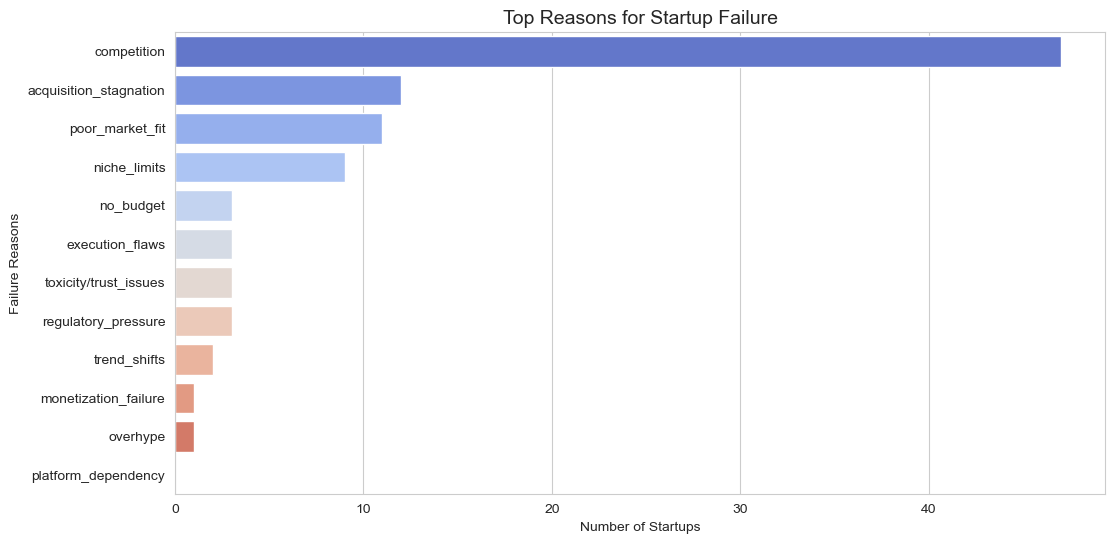

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot style
sns.set_style("whitegrid")

# Sum the failure reasons
failure_reasons = df.iloc[:, 7:-3].sum().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=failure_reasons.values, y=failure_reasons.index, hue=failure_reasons.index, legend=False, palette="coolwarm")
plt.title("Top Reasons for Startup Failure", fontsize=14)
plt.xlabel("Number of Startups")
plt.ylabel("Failure Reasons")
plt.show()

# Funding vs. Years Active 

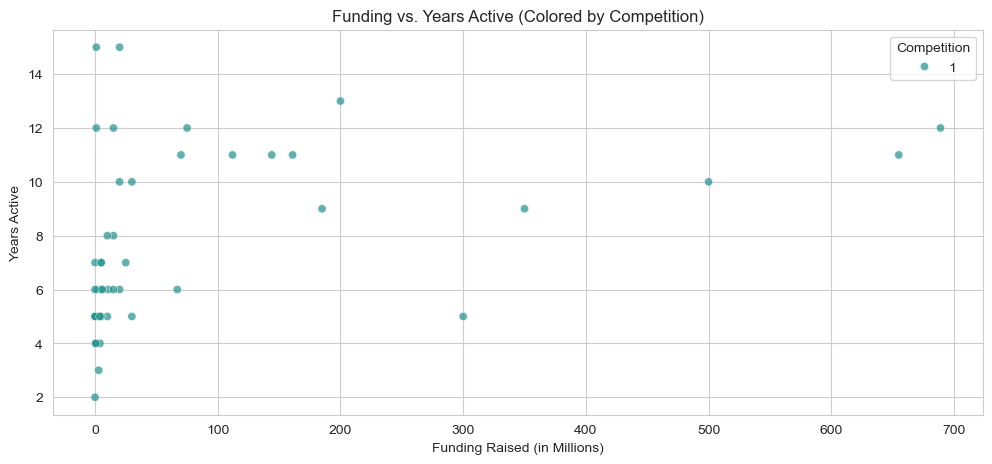

In [65]:
# Scatter Plot: Funding vs. Years Active
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["how_much_they_raised"], y=df["years_active"], hue=df["competition"], palette="viridis", alpha=0.7)
plt.title("Funding vs. Years Active (Colored by Competition)")
plt.xlabel("Funding Raised (in Millions)")
plt.ylabel("Years Active")
plt.legend(title="Competition")
plt.show()

# Failures Due to Market Competition

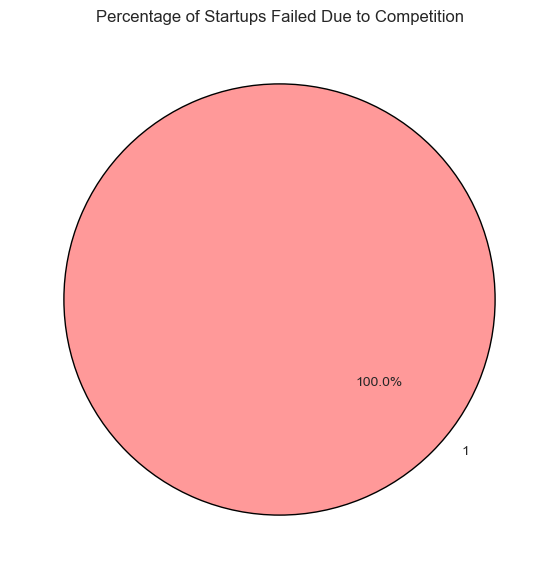

In [66]:
# Pie Chart: Failures Due to Market Competition
plt.figure(figsize=(7, 7))
df["competition"].value_counts().plot.pie(autopct='%1.1f%%', colors=["#ff9999", "#66b3ff"], startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Percentage of Startups Failed Due to Competition")
plt.ylabel("")
plt.show()

In [ ]:
Insights - More than 50% of failed startups cited competition as a key factor

In [67]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned startup failure data.csv', index=False)